# Week 12 Homework

In [1]:
# Dependencies and modules:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import seaborn as sns
sns.set_theme(style="whitegrid")
import statistics
import math
from scipy import stats
from sklearn.model_selection import train_test_split 

# loans.csv file:

loans_path = "C:/Users/Nik/Documents/loans.csv"
loans_df = pd.read_csv(loans_path)
loans_df.head(1)

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0


### 1. In 250-500 words, write a thorough discussion of when to use ML and when not to. Do NOT go over the 500-word limit. It is essential to express this concisely. This should be informed by the Machine Learning for Business DataCamp course. 

ML is the final tier of the data hierarchy-of-needs pyramid. As such, there should be a very specific circumstance present before resources are spent deploying ML.  According to the DataCamp module, ML “should not be the first data initiative the company or the team pursues.” The principle of ‘garbage in, garbage out’ should be remembered. The team should spend adequate time and resources ensuring they have first gathered enough data and that the data has been deftly pre-processed and analyzed. Then the features need to be examined and thoughtfully modeled and tested. Only once these things have taken place can machine learning be employed to benefit. 

Considering the requisite resources to employ ML, it should be considered if an actionable outcome can even be produced for the cost. If you identify the source of your churn or fraud but can’t do anything about it for one reason or another, you won’t get a return on your investment in the data analysis.  Further, what will be the gain? The Datacamp module used the example like “Would you spend one million dollars to make an extra $50k annually?” ML has to make sense from that perspective.

However, if you have a sufficient data pool, have spent the time cleaning and pre-processing that data and thinking about your problems, what your target variables should be, or date features you need for analysis, if you have identified an approach that can create actionable results and the modeling is testing well with acceptable gain margins, machine learning can then be employed as a powerful business strategy.


### 2. Perform pre-processing on the Lending Club dataset from class. Clearly use markdown to indicate each pre-processing step you are using. Note: you should use at least three different techniques. 

#### First, I want to take a good look at the df.

In [3]:
loans_df

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,NaN,NaN,NaN,...,A4,Jan-2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,NaN,NaN,NaN,...,D3,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.26,107000.0,Source Verified,29.57,...,E2,Feb-2018,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,NaN,NaN,NaN,...,A1,Feb-2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0


##### Here, I am examining features of the df.

In [4]:
print(loans_df.columns, loans_df.shape)

Index(['emp_title', 'emp_length', 'state', 'homeownership', 'annual_income',
       'verified_income', 'debt_to_income', 'annual_income_joint',
       'verification_income_joint', 'debt_to_income_joint', 'delinq_2y',
       'months_since_last_delinq', 'earliest_credit_line',
       'inquiries_last_12m', 'total_credit_lines', 'open_credit_lines',
       'total_credit_limit', 'total_credit_utilized',
       'num_collections_last_12m', 'num_historical_failed_to_pay',
       'months_since_90d_late', 'current_accounts_delinq',
       'total_collection_amount_ever', 'current_installment_accounts',
       'accounts_opened_24m', 'months_since_last_credit_inquiry',
       'num_satisfactory_accounts', 'num_accounts_120d_past_due',
       'num_accounts_30d_past_due', 'num_active_debit_accounts',
       'total_debit_limit', 'num_total_cc_accounts', 'num_open_cc_accounts',
       'num_cc_carrying_balance', 'num_mort_accounts',
       'account_never_delinq_percent', 'tax_liens', 'public_record_bankr

##### There are 10000 rows and 55 columns to this dataframe. I now want to examine more features of the df. .isnull().sum() identifies what columns have how many null values. Additionally, I sorted them most to least so I can see which columns are really craptastic.

In [5]:
loans_df.isnull().sum().sort_values(ascending=False).head(15)

verification_income_joint           8545
debt_to_income_joint                8505
annual_income_joint                 8505
months_since_90d_late               7715
months_since_last_delinq            5658
months_since_last_credit_inquiry    1271
emp_title                            833
emp_length                           817
num_accounts_120d_past_due           318
debt_to_income                        24
installment                            0
num_mort_accounts                      0
account_never_delinq_percent           0
tax_liens                              0
public_record_bankrupt                 0
dtype: int64

##### Surprisingly, only 10 columns contained null values:
* verification_income_joint           8545
* debt_to_income_joint                8505
* annual_income_joint                 8505
* months_since_90d_late               7715
* months_since_last_delinq            5658
* months_since_last_credit_inquiry    1271
* emp_title                            833
* emp_length                           817
* num_accounts_120d_past_due           318
* debt_to_income                        24


#### In the following blocks, I want to examine data more closely, remove or fill-in missing data, remove less useful columns, and convert column types where possible by using  pd.factorize().

##### Looking at the data, the columns with large amounts of NANs are the joint values for couples that don't apply to individuals, so I don't need to drop those columns, I will just fill them with 0s. I will drop verification_income_joint now, however, because it doesn't survive my cull later. I will also drop emp_title because I don't see how an arbitrary job title affects loan repayment as much as, say, income or years employed.

In [6]:
loans_df['annual_income_joint'] = loans_df['annual_income_joint'].fillna(0)
loans_df['debt_to_income_joint'] = loans_df['debt_to_income_joint'].fillna(0)

# I will drop these columns now, however.
loans_df.drop(labels ='verification_income_joint', axis=1, inplace=True)
loans_df.drop(labels ='emp_title', axis=1, inplace=True)

#checking results:
loans_df.isnull().sum().sort_values(ascending=False).head(10)
#output as expected!

months_since_90d_late               7715
months_since_last_delinq            5658
months_since_last_credit_inquiry    1271
emp_length                           817
num_accounts_120d_past_due           318
debt_to_income                        24
term                                   0
num_cc_carrying_balance                0
num_mort_accounts                      0
account_never_delinq_percent           0
dtype: int64

##### # The remaining columns with NAN values are numeric types so I can fill NANs with 0s.

In [7]:
loans_df['months_since_90d_late'] = loans_df['months_since_90d_late'].fillna(0)
loans_df['months_since_last_delinq'] = loans_df['months_since_last_delinq'].fillna(0)
loans_df['months_since_last_credit_inquiry'] = loans_df['months_since_last_credit_inquiry'].fillna(0)
loans_df['debt_to_income'] = loans_df['debt_to_income'].fillna(0)
loans_df['emp_length'] = loans_df['emp_length'].fillna(0)

# I later decide to drop this column for low contribution to dataset, so I'm dropping it here:
loans_df.drop(labels ='num_accounts_120d_past_due', axis=1, inplace=True)

#checking results:
loans_df.isnull().sum().sort_values(ascending=False).head()
#output as expected! NANs have been cleaned!

emp_length                 0
state                      0
num_total_cc_accounts      0
num_open_cc_accounts       0
num_cc_carrying_balance    0
dtype: int64

In [8]:
loans_df.shape

(10000, 52)

I have 10000 rows and 52 columns. This is still more data than I want to work with. I want to see if there are some columns that don't really have a lot of value.  

In [9]:
# Checking value counts for columns. This will help me identify columns that don't need to be
# in my model. I will be looking for columns that have only a couple entries or categories,
# or that don't make sense to include in predicting loan defaults.

df_columns_list = loans_df.columns
for column in df_columns_list:
    print(loans_df[column].value_counts())

10.0    3332
0.0     1507
2.0      967
3.0      862
1.0      685
5.0      645
4.0      611
6.0      404
7.0      368
9.0      312
8.0      307
Name: emp_length, dtype: int64
CA    1330
TX     806
NY     793
FL     732
IL     382
NJ     338
OH     338
GA     334
NC     299
PA     298
VA     261
AZ     255
MD     247
MI     245
MA     237
CO     235
WA     235
CT     181
IN     178
TN     167
MN     159
MO     159
NV     158
SC     145
OR     130
WI     128
AL     122
KY      97
LA      96
KS      89
OK      81
MS      72
AR      70
WV      68
UT      61
NE      56
RI      53
NH      47
NM      43
ID      38
HI      35
AK      33
ME      26
DE      24
MT      24
VT      23
SD      20
WY      19
DC      19
ND      14
Name: state, dtype: int64
MORTGAGE    4789
RENT        3858
OWN         1353
Name: homeownership, dtype: int64
60000.00    383
50000.00    350
65000.00    314
70000.00    273
75000.00    260
           ... 
25560.00      1
63950.00      1
22104.00      1
34415.16      1
96774

##### Using the above report, I picked 11 columns to drop that didn't add much to the overall dataset. Three I went back and dropped in above cells. This whittled my df down to a more concentrated and meaningful 43 columns.

In [10]:
loans_df.drop(['disbursement_method','initial_listing_status','num_accounts_30d_past_due','current_accounts_delinq','issue_month','public_record_bankrupt','num_collections_last_12m','application_type','term'], axis=1,inplace=True)
loans_df.shape

(10000, 43)

##### Next I want to convert columns to numeric values as necesarry. Having numeric-only data greatly increases processing efficiency, thus is best-practice. I will use data types and convert any columns with object type to int type with pd.factorize.

In [11]:
loans_df.dtypes

emp_length                          float64
state                                object
homeownership                        object
annual_income                       float64
verified_income                      object
debt_to_income                      float64
annual_income_joint                 float64
debt_to_income_joint                float64
delinq_2y                             int64
months_since_last_delinq            float64
earliest_credit_line                  int64
inquiries_last_12m                    int64
total_credit_lines                    int64
open_credit_lines                     int64
total_credit_limit                    int64
total_credit_utilized                 int64
num_historical_failed_to_pay          int64
months_since_90d_late               float64
total_collection_amount_ever          int64
current_installment_accounts          int64
accounts_opened_24m                   int64
months_since_last_credit_inquiry    float64
num_satisfactory_accounts       

##### I will factorize the following columns: loan_status, sub_grade, grade, loan_purpose, verified_income, homeownership, and state. While doing so, I will add a now factorized column to my dataframe and drop the column with the original categorical data. So that I have a reference of what codes equal what values, I will create a new dataframe of code and value columns:

In [12]:
columns_to_factorize = ['homeownership','sub_grade','loan_purpose','grade',
                        'loan_status','verified_income','state']

for column in columns_to_factorize:
    loans_df[column+'_codes'] = pd.factorize(loans_df[column])[0]+1
    column_codes = pd.DataFrame(loans_df[column])
    column_codes[column+'_codes']=loans_df[column+'_codes']
    loans_df = loans_df.drop(column, axis=1)
    print(column_codes[[column, column+'_codes']].value_counts())


homeownership  homeownership_codes
MORTGAGE       1                      4789
RENT           2                      3858
OWN            3                      1353
dtype: int64
sub_grade  sub_grade_codes
B1         9                  647
B2         8                  638
B5         6                  631
C1         2                  597
B4         23                 581
C2         5                  572
A4         15                 568
B3         19                 540
A3         4                  504
C4         7                  503
C3         1                  501
A5         14                 485
A2         13                 480
C5         24                 480
A1         16                 422
D2         20                 323
D1         3                  319
D3         10                 311
D5         18                 262
D4         17                 231
E5         12                  91
E3         28                  73
E4         26                  73
E2         25 

In [13]:
loans_df.head()

,emp_length,annual_income,debt_to_income,annual_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,paid_principal,paid_interest,paid_late_fees,homeownership_codes,sub_grade_codes,loan_purpose_codes,grade_codes,loan_status_codes,verified_income_codes,state_codes
0,3.0,90000.0,18.01,0.0,0.00,0,38.0,2001,6,28,...,984.14,1015.19,0.0,1,1,1,1,1,1,1
1,10.0,40000.0,5.04,0.0,0.00,0,0.0,1996,1,30,...,348.63,150.49,0.0,2,2,2,1,1,2,2
2,3.0,40000.0,21.15,0.0,0.00,0,28.0,2006,4,31,...,175.37,106.43,0.0,2,3,3,2,1,3,3
3,1.0,30000.0,10.16,0.0,0.00,0,0.0,2007,0,4,...,2746.74,566.15,0.0,2,4,2,3,1,2,4
4,10.0,35000.0,57.96,57000.0,37.66,0,0.0,2008,7,22,...,1569.85,754.80,0.0,2,1,4,1,1,1,5


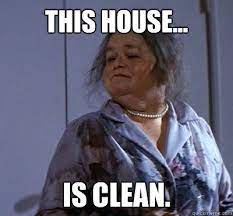

##### Now I can finally start my train_test_split process! I want to see if I can create a model that will predict percentage of accounts never delinquent in order to help the lending club determine the safest lendees.

In [15]:
loans_X = loans_df.drop('account_never_delinq_percent',axis=1)
loans_y = loans_df[['account_never_delinq_percent']]

X_train, X_test, y_train, y_test = train_test_split(loans_X, loans_y, test_size=0.33, random_state=39)

print(y_train['account_never_delinq_percent'].value_counts())

100.0    3769
91.7       80
93.8       73
90.0       72
90.9       71
         ... 
29.4        1
57.7        1
61.3        1
74.5        1
65.0        1
Name: account_never_delinq_percent, Length: 254, dtype: int64


### 3. Create a correlation matrix with a heatmap for the features in the Lending Club dataset. Use markdown to write about your takeaways in under 250 words.

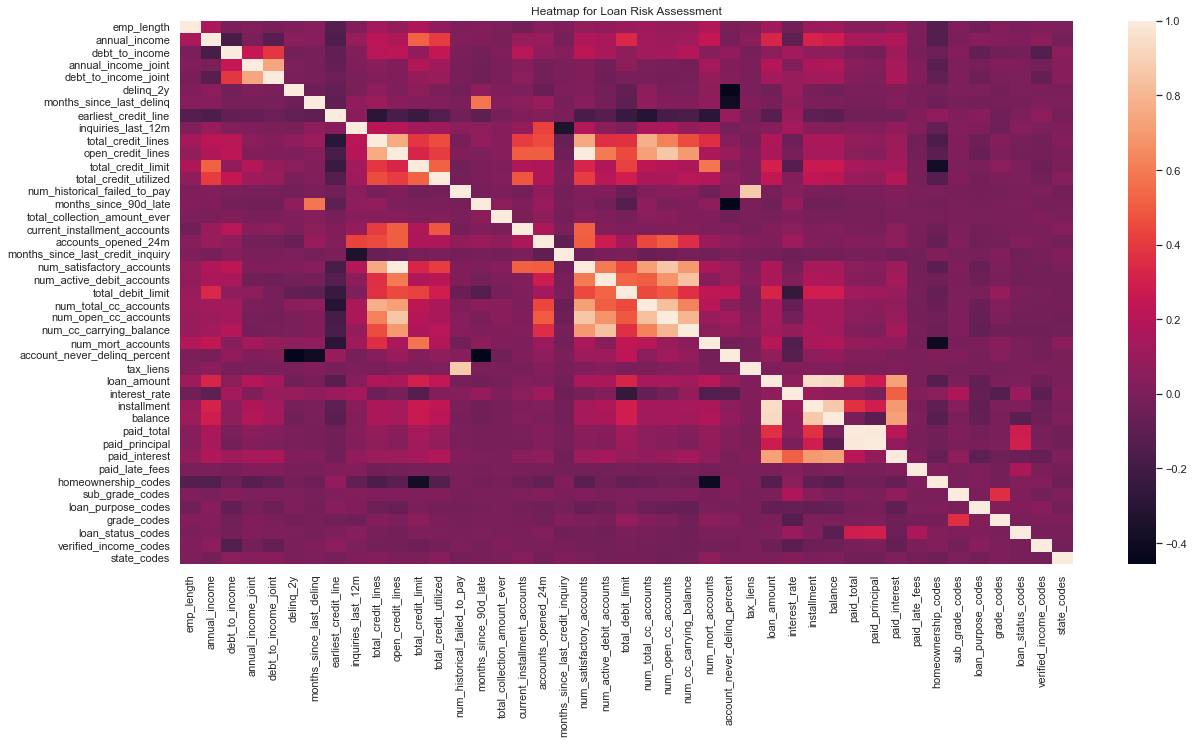

In [16]:
loans_corr = loans_df.corr()
loans_corr
plt.subplots(1,1,figsize=(20,10))
sns.heatmap(loans_corr)
plt.title("Heatmap for Loan Risk Assessment")
plt.show()

### Takeaways:
I love using a heatmap to visualize correlation! I work with correlation in my daily life so this is a fantastic thing to learn. It was difficult at first to forsee how some pieces of data would clean up or if they would visualize well. Definately playing with your data for a while first to get comfortable with it and understand what you are looking at is necessary *before* you start cleaning. I had to go back thru my cleaning process a few times as I better learned what did and didn't make sense to correlate. I am surprised and interested to see the little pockets of higher correlation. This was a rewarding exercise.

### 4. Create a histogram showing the frequency of loan_amounts. Describe what you see. Pay special attention to bin sizes, and clearly describe how you chose your bin sizes.

##### I chose 40 bins, because the min loan amount is 1000 dollars and the max is 40000 dollars. 40 bins divides the difference into 1000 dollar increments. It is easy to see in this visualization the the lending club certifies far more 10,000 dollar loans than any other amount, but loans between 5 and 20 thousand dollars comprise the bulk of its business.

Min loan amount: 1000
Max loan amount: 40000
Average loan amounts: 16361.9225


<AxesSubplot:title={'center':'Loan Amount distribution'}>

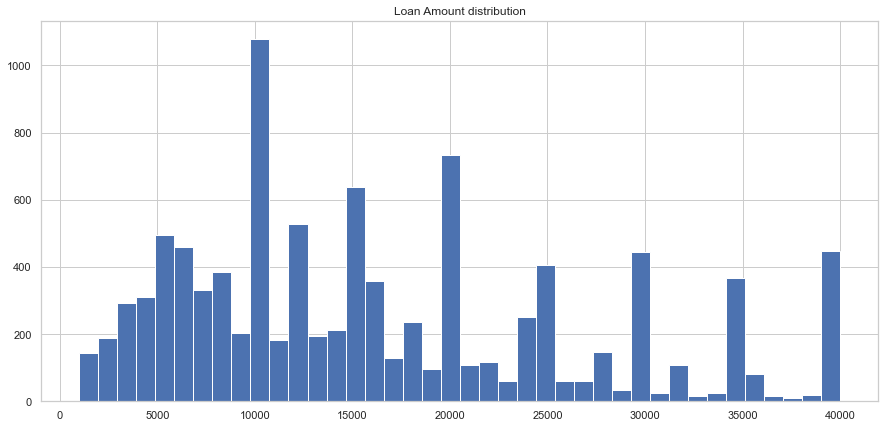

In [17]:
print("Min loan amount:",loans_df['loan_amount'].min())
print("Max loan amount:",loans_df['loan_amount'].max())
print("Average loan amounts:",loans_df['loan_amount'].mean())

plt.subplots(figsize=(15,7))
plt.title("Loan Amount distribution")
loans_df['loan_amount'].hist(bins = 40)

5. Create a new column called region that uses a lambda and shows which part of the US someone lives in, split up into Pacific, Plains, Midwest, Northeast, and South. Consider having your lambda call a function. 

    a. Is there a better way to do this than with a lambda? 

    b. Either use two different lambdas or a lambda and a different technique and see which one is more performant. Explain your findings in the markdown.

##### First, I need to define US regions. I did not find a single map with those particular five regions, so I will blend two different maps that I found:

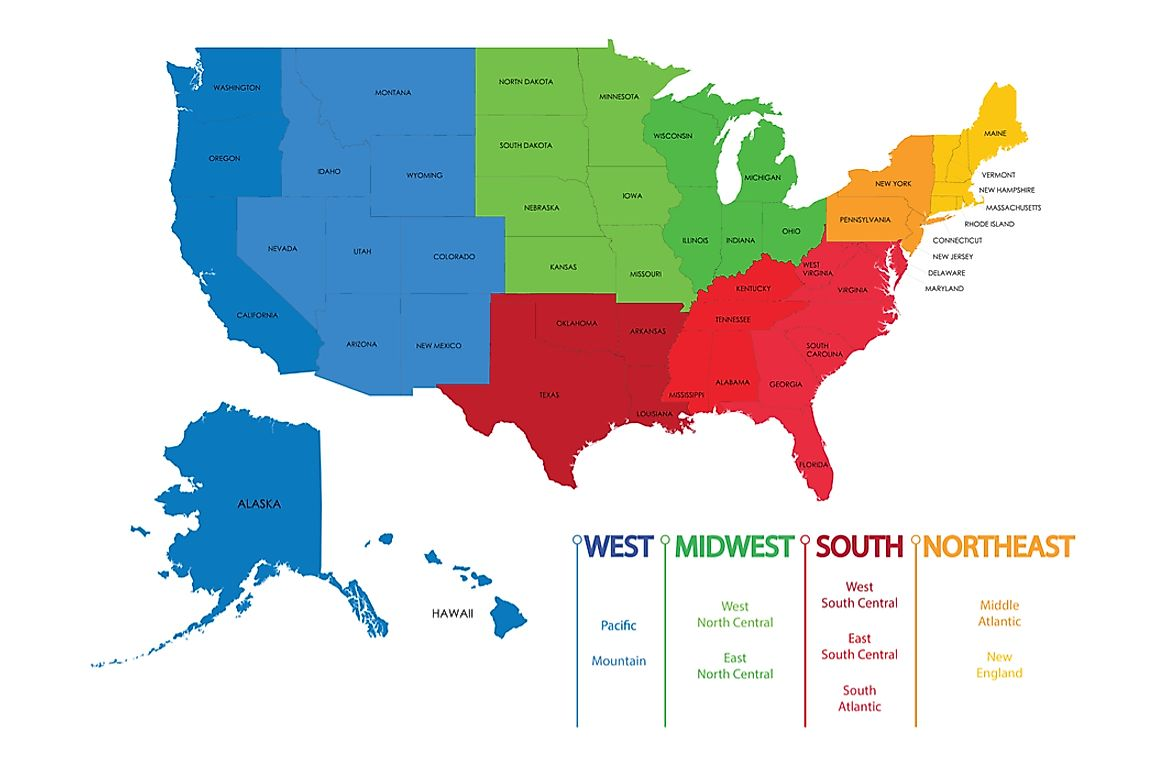

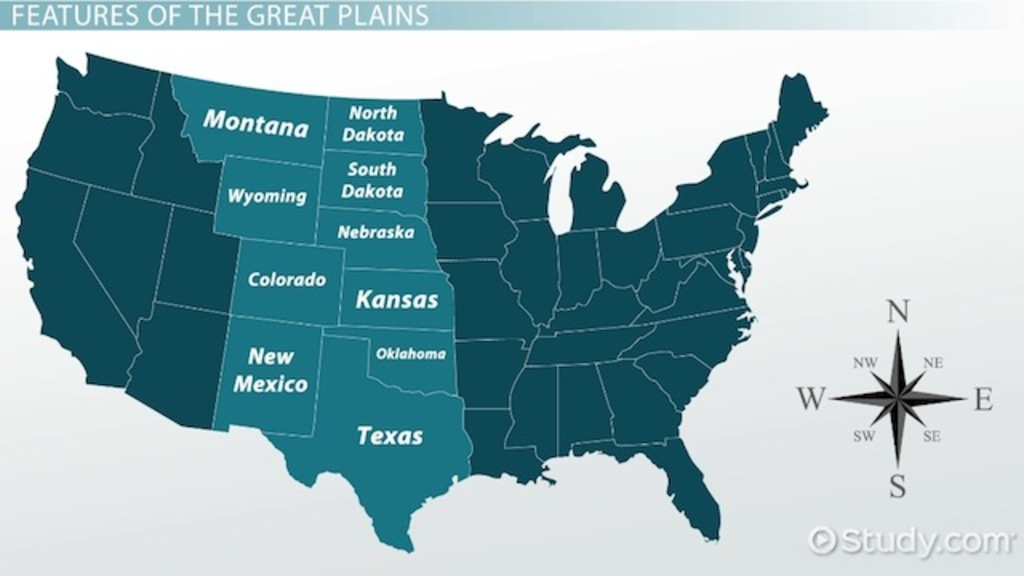

##### To ensure I correctly remember the states' abbreviations, I will reference them here:

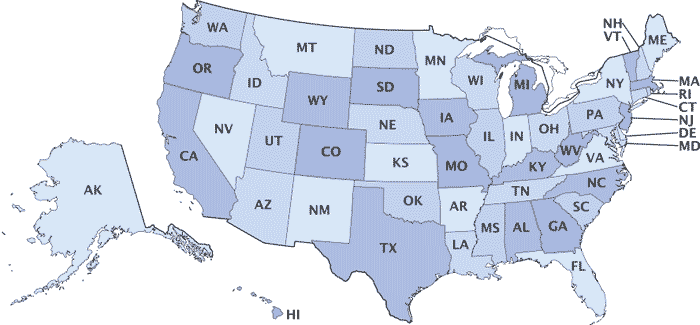

In [18]:
# Creating Lists of Regions:
Northeast = ['PA','MD','DE','NJ','CT','RI','MA','ME','VT','NH','NY','DC'] 
South = ['WV','VA','KY','TN','AR','LA','MS','AL','GA','NC','SC','FL']
Midwest = ['MN','IA','MO','WI','IL','MI','IN','OH']
Pacific = ['ID','NV','UT','AZ','CA','WA','OR','HI','AK']
Plains = ['TX', 'NM', 'OK', 'KS','CO','NE','WY','SD','ND','MT' ]

In [19]:
# Now I will add an object type column BACK into my loans_df from the df I created to store
# factorized codes matched with their original values:
loans_df['state'] = column_codes['state']
loans_df.head(3)

,emp_length,annual_income,debt_to_income,annual_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,paid_interest,paid_late_fees,homeownership_codes,sub_grade_codes,loan_purpose_codes,grade_codes,loan_status_codes,verified_income_codes,state_codes,state
0,3.0,90000.0,18.01,0.0,0.0,0,38.0,2001,6,28,...,1015.19,0.0,1,1,1,1,1,1,1,NJ
1,10.0,40000.0,5.04,0.0,0.0,0,0.0,1996,1,30,...,150.49,0.0,2,2,2,1,1,2,2,HI
2,3.0,40000.0,21.15,0.0,0.0,0,28.0,2006,4,31,...,106.43,0.0,2,3,3,2,1,3,3,WI


In [20]:
#starting timer
start = time.time()

# lambda approach   
def region(row):
    if row['state'] in Northeast:
        return 'northeast'
    if row['state'] in South:
        return 'south'   
    if row['state'] in Midwest:
        return 'midwest'
    if row['state'] in Pacific:
        return 'pacific'
    if row['state'] in Plains:
        return 'plains'
    
loans_df['region'] = loans_df.apply(lambda row: region(row), axis =1)

end = time.time()

print("Time taken to process lambda function approach",end-start)

Time taken to process lambda function approach 0.18542814254760742


In [21]:
# starting timer
start = time.time()

# np.select approach
conditions = [loans_df['state'].isin(Northeast),
             loans_df['state'].isin(South),
             loans_df['state'].isin(Midwest),
             loans_df['state'].isin(Pacific),
             loans_df['state'].isin(Plains)]

output = ['Northeast','South','Midwest','Pacific','Plains']

loans_df['region'] = np.select(conditions,output)

end = time.time()

print("Time taken to process np.select approach",end-start)

Time taken to process np.select approach 0.008992433547973633


##### Wow, lamda was *significantly* less performative than using the np.select function, taking over 20 times longer to execute! So, while very technical and effective, lambda should be used carefully.

6. Create subplot histograms to show if loan_amounts differ by region. Summarize your findings.

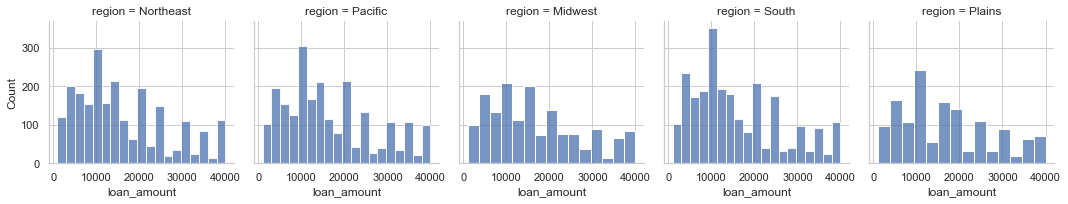

In [23]:
loans_region_df = loans_df[['region','loan_amount']]
#loans_region_df
g = sns.FacetGrid(loans_region_df, col='region')

g.map(sns.histplot, 'loan_amount')

plt.show()

##### Observations are as follows:
* The fewest loans are made in the Midwest, and Plains states take out the fewest high-dollar loans. However, cost-of-living is lowest in these states so that is expected.  
* Not only are there more loans made in the south, but the loan amounts are higher.
* The northeast and pacific regions show similar loan behavior.

7. Think of some questions you want to ask our guests next week. You can ask them anything, just make sure its thoughtful. 

Questions: 

* How long after you started in this field did you feel confident you knew what you were doing?
* How many momnents per month would you say you fell Imposter Syndrome?
* What is one thing you know now that you wish you knew before you started this career or this current role?

# DataCamp Completion

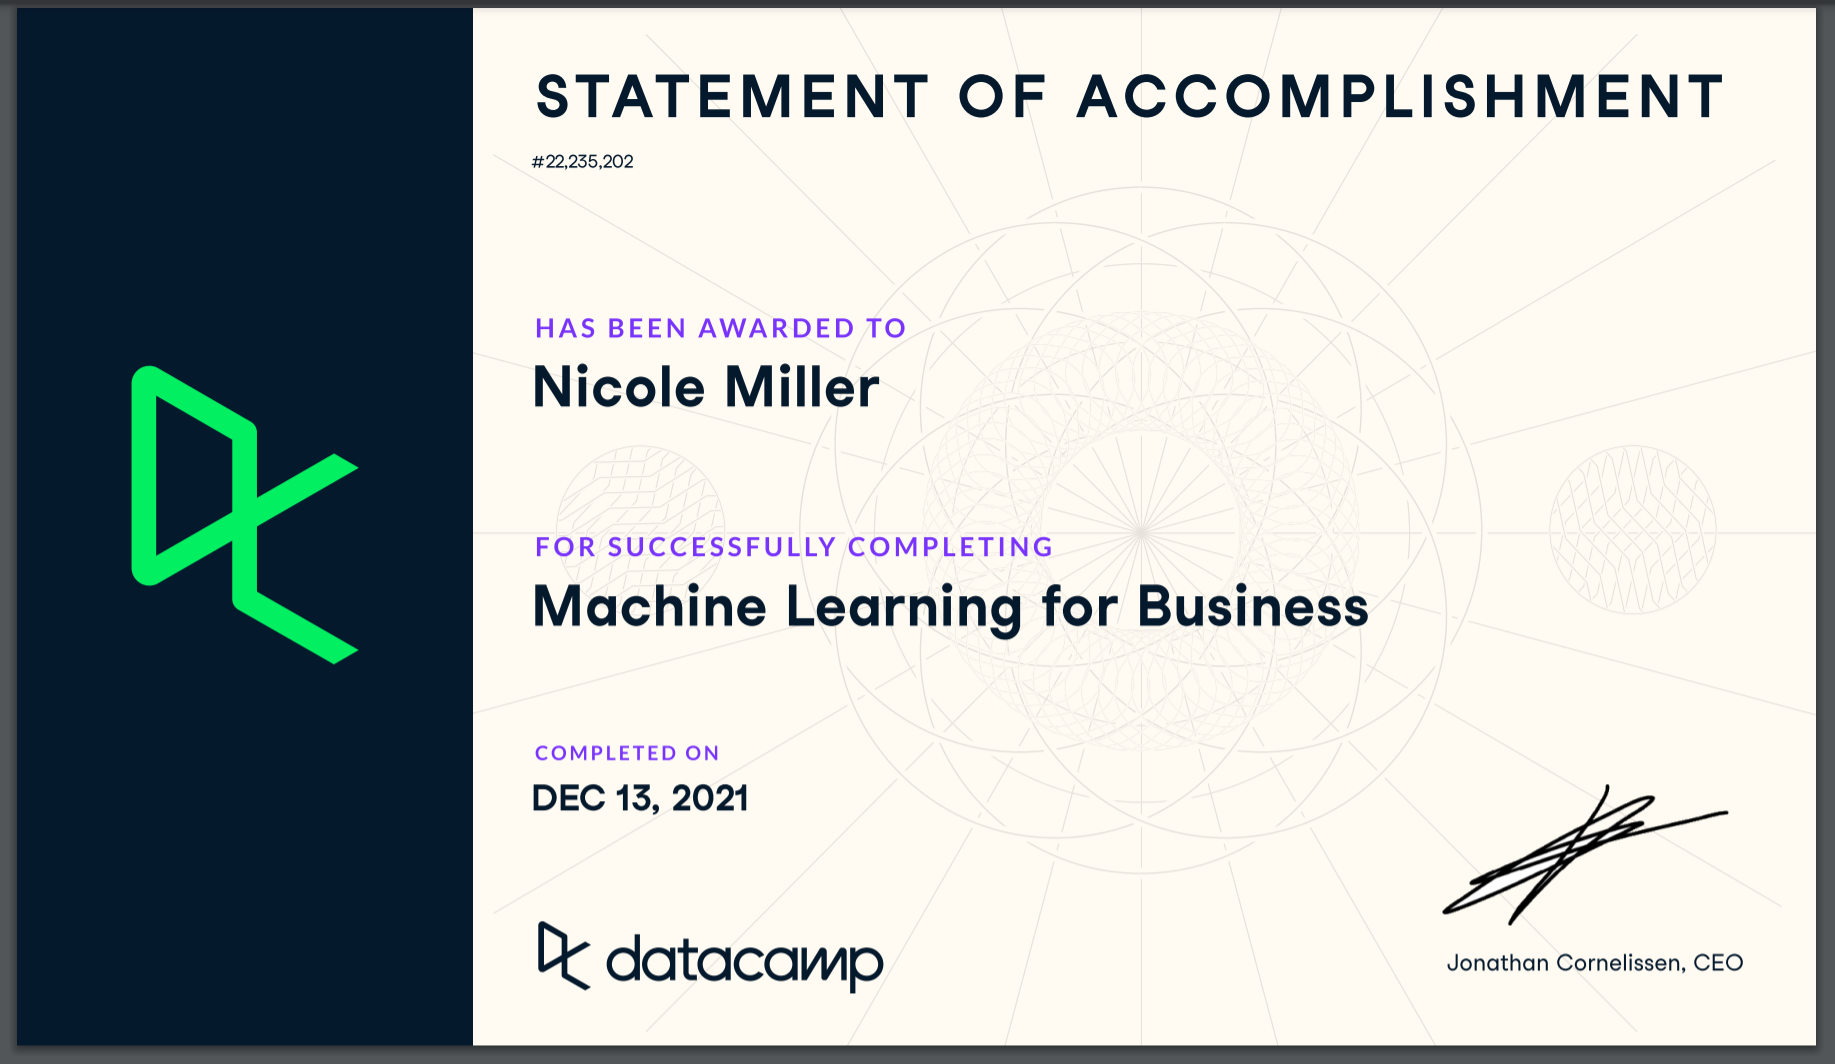

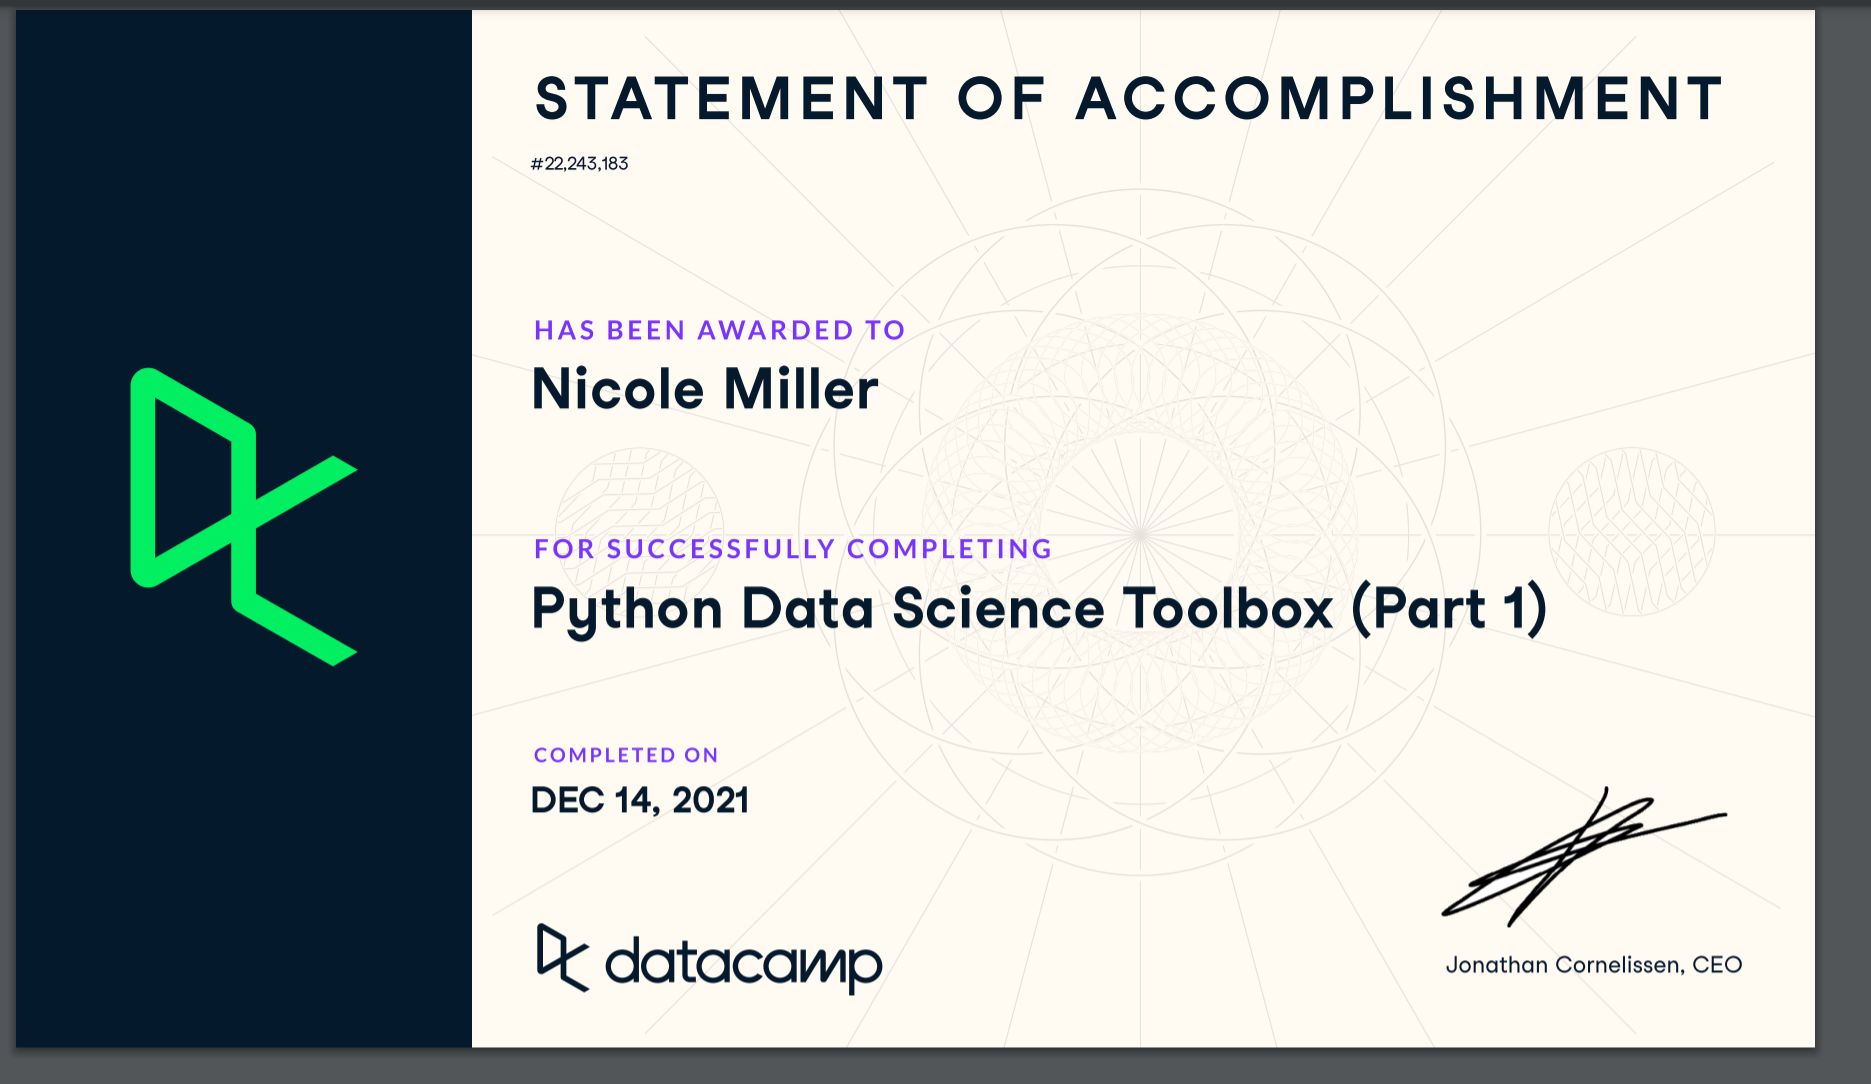